In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML
import os
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg.exe'

In [21]:
class Params():
    def __init__(self):
        self.pop_size = 2000
        self.age_mean = 46
        self.age_std = 13
        self.age_min = 0
        self.age_max = 100
        
        self.num_of_frames = 200
        self.x_min = 0
        self.x_max = 1
        self.y_min = 0
        self.y_max = 1
        
        self.save_folder = "C:/Users/ParthivNaresh/Pandemic-Simulations/Outputs/"

In [3]:
def initialize(pm):
    population = pd.DataFrame()
    
    population["id"] = pd.Series([x for x in range(pm.pop_size)])
    population["current_x"] = np.random.uniform(0, 1, pm.pop_size)
    population["current_x"] = np.clip(population["current_x"], 0.02, 0.98)
    population["current_y"] = np.random.uniform(0, 1, pm.pop_size)
    population["current_y"] = np.clip(population["current_y"], 0.02, 0.98)
    population["age"] = np.random.normal(pm.age_mean, pm.age_std, size = pm.pop_size)
    population["age"] = np.clip(population["age"], pm.age_min, pm.age_max)
    # 0 for healthy, 1 for infected, 2 for immune and infectious, 3 for immune, 4 for dead 
    population["state"] = pd.Series(0 for x in range(pm.pop_size))
    #data.insert(data.columns.get_loc("state"), "Age", np.random.normal(size=2000), True)
    
    return population


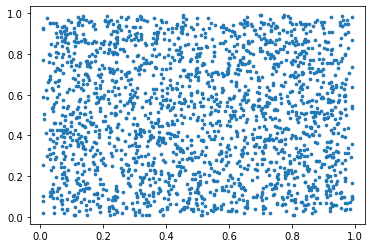

In [26]:
class Simulation():
    
    def __init__(self, *args, **kwargs):
        self.params = Params()
        self.initialize_population()
        self.stream = self.data_stream()
        
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim((self.params.x_min, self.params.x_max))
        self.ax.set_xlim((self.params.y_min, self.params.y_max))
        self.ani = animation.FuncAnimation(self.fig, self.move_population, frames = self.params.num_of_frames, 
                                           init_func=self.setup_plot, interval = 66.67, blit = True)
    def initialize_population(self):
        self.population = initialize(self.params)
        
    def setup_plot(self):
        data = next(self.stream)
        self.scat = self.ax.scatter(x = self.population["current_x"], 
                                    y = self.population["current_y"], 
                                    s = 7)
        return self.scat,
        
    def data_stream(self):
        while True:
            x_delta = np.clip(np.round(np.random.normal(0, 0.05, self.params.pop_size), 5), -0.01, 0.01).reshape(self.params.pop_size,1)
            y_delta = np.clip(np.round(np.random.normal(0, 0.05, self.params.pop_size), 5), -0.01, 0.01).reshape(self.params.pop_size,1)
            xy_delta = np.hstack([x_delta, y_delta])

            yield xy_delta
    
    def move_population(self, i):
        xy_delta = next(self.stream)
        xy_pos = np.hstack([np.array(self.population["current_x"]).reshape(self.params.pop_size,1), 
                            np.array(self.population["current_y"]).reshape(self.params.pop_size,1)])
        xy_new_pos = xy_pos + xy_delta
        self.scat.set_offsets(xy_new_pos)
        
        self.population["current_x"] = np.clip(xy_new_pos[:, 0], 0.02, 0.98)
        self.population["current_y"] = np.clip(xy_new_pos[:, 1], 0.02, 0.98)
        
        return self.scat,
        
    def show(self):
        print("Method show")
        plt.draw()

if __name__ == '__main__':
    a = Simulation()
    #a.show()
    plt.cla()
    HTML(a.ani.to_html5_video())

In [27]:
HTML(a.ani.to_html5_video())